# Q-Learning

In [9]:
import gym
import numpy as np
import random
from collections import deque
from matplotlib import pyplot as plt

env = gym.make('Taxi-v2')
env.reset()

for t in range(5):
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    
    # state which taxi is in is literally represented by a number.
    print(observation, reward, done)

    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
env.close()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

351 -10 False
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
331 -1 False
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
331 -10 False
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
231 -1 False
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
231 -10 False


In [103]:
# CONSTANTS

ALPHA = 0.05
ALPHA_START = 0.1
ALPHA_TAPER = 0.01
GAMMA = 0.95

EPSILON_START = 1
EPSILON_TAPER = 0.01

NUM_EPISODES = 500
MAX_STEPS = env.spec.timestep_limit

# Logging
reward_history = deque(maxlen=1000)

# Initialise Q table

available_state_size = env.observation_space.n
available_action_size = env.action_space.n

Q = np.zeros((available_state_size, available_action_size))

update_counts = np.zeros((available_state_size, available_action_size), dtype=np.dtype(int))

In [104]:
def greed_epsilon(Q, state, eps):
    if ( random.random() < (1-eps)):
        # index of largest action no the value of the largest action
        return np.argmax(Q[state])
    else:
        return env.action_space.sample()

def update_q_table(state, action, reward, next_state, Q):
    alpha = ALPHA_START / (1.0 + update_counts[state][action] * ALPHA_TAPER)
    update_counts[state][action] += 1
    
    current_Q = Q[state, action]
    max_a_Q = Q[next_state, np.argmax((Q[next_state]))]

    Q[state, action] = current_Q + alpha * ( reward +  GAMMA * max_a_Q - current_Q)
    
    return Q

In [105]:
reward_log = []

for episode in range(5000):
    total_reward = 0

    eps = EPSILON_START / (1.0 + episode * EPSILON_TAPER)
    
    if (episode % 1000 == 0):
        print("epi: " ,episode, "\tmoving average reward: ",np.mean(reward_history) , "\tEps: ", eps)

    state = env.reset()
    
    while t in range(MAX_STEPS):

        action = greed_epsilon(Q, state, eps)
        next_state, reward, done, info = env.step(int(action))
        Q = update_q_table(state, int(action), reward, next_state, Q)
        
        state = next_state
        
        total_reward += reward

        
        if done:
            break
    
    reward_history.append(total_reward)
    reward_log.append(np.mean(reward_history))

epi:  0 	moving average reward:  nan 	Eps:  1.0
epi:  1000 	moving average reward:  -165.902 	Eps:  0.09090909090909091
epi:  2000 	moving average reward:  0.49 	Eps:  0.047619047619047616
epi:  3000 	moving average reward:  5.966 	Eps:  0.03225806451612903
epi:  4000 	moving average reward:  7.111 	Eps:  0.024390243902439025


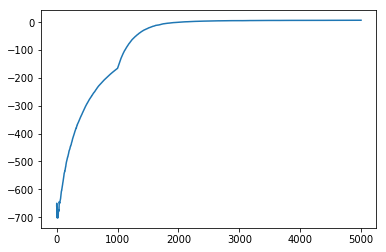

In [106]:
plt.plot(reward_log)

## Good other blog posts.

- https://www.freecodecamp.org/news/an-introduction-to-q-learning-reinforcement-learning-14ac0b4493cc/
    - good diagrams
- https://towardsdatascience.com/simple-reinforcement-learning-q-learning-fcddc4b6fe56
    - simple and straight forward, it's nice to have code snippets to explain parts, perhaps it should be text, code, equation rather than text, equation, diagram. Perhaps look at which is best for the situtation